In [ ]:
!nvidia-smi

Fri Oct 31 06:12:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.6 MB/s eta 0:00:00


In [ ]:
!yolo version

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.223


In [ ]:
!ls "/content/drive/MyDrive/Textile image dataset"

data.yaml  README.roboflow.txt	test  train  valid


In [ ]:
!yolo detect train data="/content/drive/MyDrive/Textile image dataset/data.yaml" model=yolov8n.pt epochs=50 imgsz=640

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Textile image dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

In [ ]:
!cp -r /content/runs/detect/train2 /content/drive/MyDrive/Textile\ image\ dataset/


In [ ]:
!ls /content/runs/detect/train2

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch9400.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch9401.jpg  weights
labels.jpg			 train_batch9402.jpg


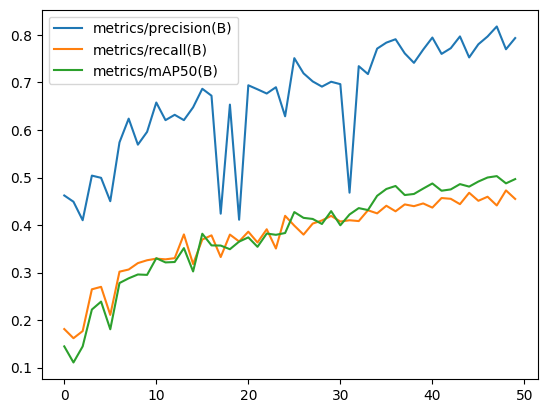

In [ ]:
import pandas as pd, matplotlib.pyplot as plt
df = pd.read_csv('/content/runs/detect/train2/results.csv')
df[['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)']].plot()
plt.show()

In [ ]:
!yolo detect predict model="/content/runs/detect/train2/weights/best.pt" source="/content/drive/MyDrive/Textile image dataset/test/images"


Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

image 1/197 /content/drive/MyDrive/Textile image dataset/test/images/0af7a5d9e235371f1024398936_jpg.rf.81f38f8d0babda1374b88caa0865a159.jpg: 640x640 1 Knot, 7.3ms
image 2/197 /content/drive/MyDrive/Textile image dataset/test/images/101_jpg.rf.cd93914690f2b268836fd327485ab60a.jpg: 480x640 3 Knots, 284.6ms
image 3/197 /content/drive/MyDrive/Textile image dataset/test/images/110_jpg.rf.93911212367c8c46c681b28401f49009.jpg: 640x480 4 Knots, 63.3ms
image 4/197 /content/drive/MyDrive/Textile image dataset/test/images/126_jpg.rf.d0e309da154395d6f514ee08c4d2a972.jpg: 480x640 3 Knots, 13.2ms
image 5/197 /content/drive/MyDrive/Textile image dataset/test/images/147_jpg.rf.c1e4b85c7dec090ebba3690295f25b54.jpg: 640x480 1 Knot, 7.1ms
image 6/197 /content/drive/MyDrive/Textile image dataset/test/images/14_jpg.rf.96801497467533002c82b091dbc

In [ ]:
!ls /content/runs/detect/predict

0af7a5d9e235371f1024398936_jpg.rf.81f38f8d0babda1374b88caa0865a159.jpg
101_jpg.rf.cd93914690f2b268836fd327485ab60a.jpg
110_jpg.rf.93911212367c8c46c681b28401f49009.jpg
126_jpg.rf.d0e309da154395d6f514ee08c4d2a972.jpg
147_jpg.rf.c1e4b85c7dec090ebba3690295f25b54.jpg
14_jpg.rf.96801497467533002c82b091dbc52352.jpg
158_jpg.rf.eb1d5b80a9684e1c7dca0d88b4c47745.jpg
169_jpg.rf.bea2056a4c40eecf733872e6ebd5a8cd.jpg
182_jpg.rf.edef9578956c3bf599af20ed30e87f5d.jpg
188_jpg.rf.3876a0c4ae6feb9a8eb2b602184a6a94.jpg
191_jpg.rf.552428a23a8d5188ec2c3a61bc8e98b5.jpg
192_jpg.rf.b61120b80b92197cf782e0201b6565e2.jpg
1ae0a319a16fe7ed1604277412_jpg.rf.2eff992bc885def136df11b3ba0bae25.jpg
20250128_123029_jpg.rf.1d9ca5c01d5b9a26ba4e1e04ba666efe.jpg
20250128_123105_jpg.rf.45f1bd734fea5a9b5306bd3432b3e6d1.jpg
204_jpg.rf.dfba6a468c1ce42a42dac2d673ffa22e.jpg
213_jpg.rf.7eadf6523fac159a7b5043c9bc64072d.jpg
215_jpg.rf.6e5c98935dfa7b834dcf07cd0f734df9.jpg
222_jpg.rf.b0cf253868b29729821c40605c70022b.jpg
233_jpg.rf.584a762a

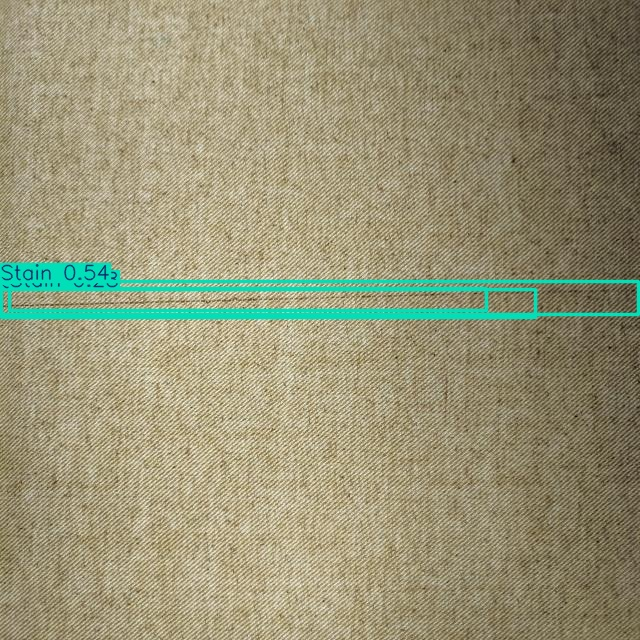

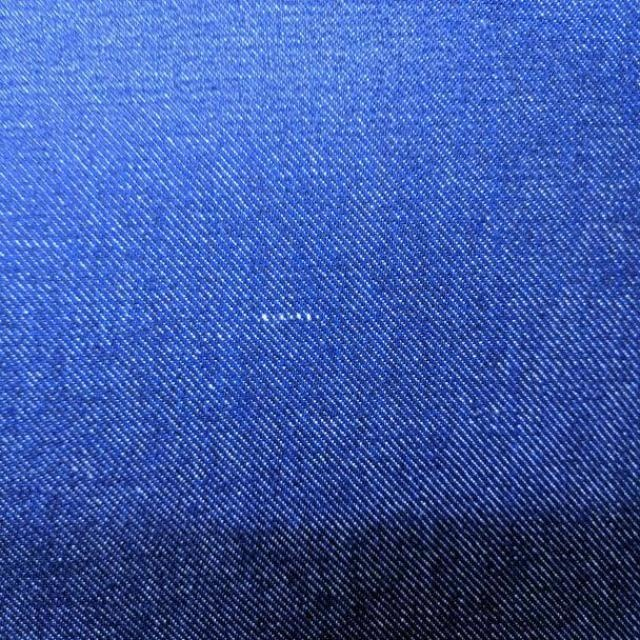

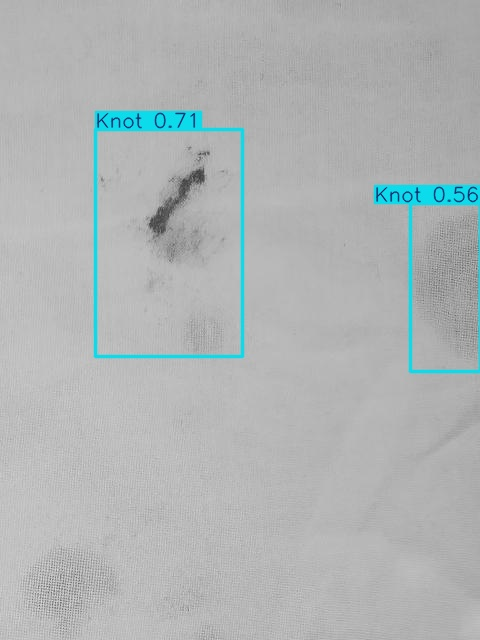

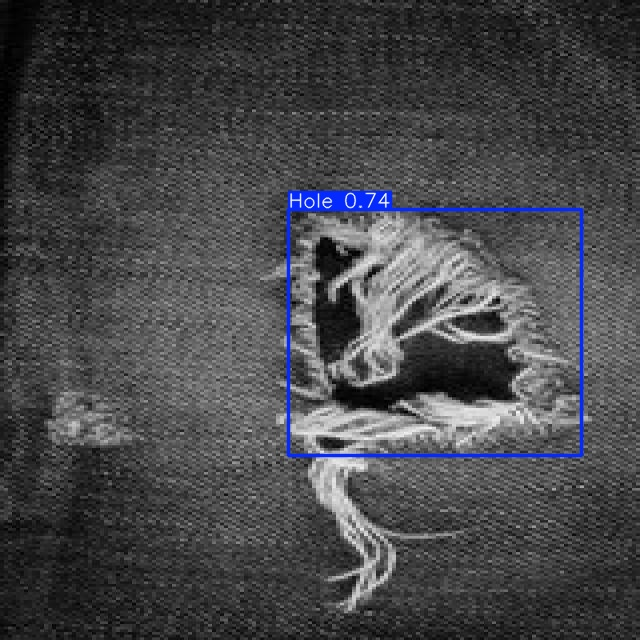

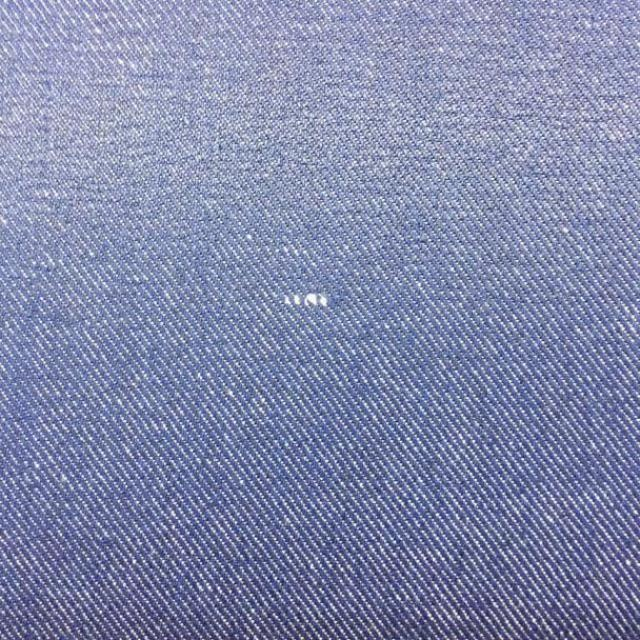

In [ ]:
from IPython.display import Image, display
import glob

for img_path in glob.glob("/content/runs/detect/predict/*.jpg")[:5]:
    display(Image(filename=img_path))

In [ ]:
!yolo val \
    model="/content/runs/detect/train2/weights/best.pt" \
    data="/content/drive/MyDrive/Textile image dataset/data.yaml" \
    split=test

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 58.4±7.2 MB/s, size: 102.0 KB)
val: Scanning /content/drive/MyDrive/Textile image dataset/test/labels... 197 images, 52 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 197/197 3.0it/s 1:06
val: New cache created: /content/drive/MyDrive/Textile image dataset/test/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 28, len(boxes) = 232. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 4.0it/s 3.2s
                   all        197        232      0.814      0.503      0.528      0.275
                  Hole        